### Data sets

**We use the following datasets:**

    - Monthly Fed interest rate from 1955 to 2022: https://fred.stlouisfed.org/series/FEDFUNDS
    - Monthly US unemployment rate from ? to 2022: https://data.bls.gov/pdq/SurveyOutputServlet
    - Monthly SP500 index: https://www.wsj.com/market-data/quotes/index/SPX/historical-prices
    - Monthly NASDAX index
    - Monthly Bitcoin

In [7]:
import pandas as pd

In [23]:
fed_df = pd.read_csv("../data/economy/fed_rates.csv")
fed_df.shape

(818, 2)

In [24]:
fed_df.head()

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


<AxesSubplot:xlabel='DATE'>

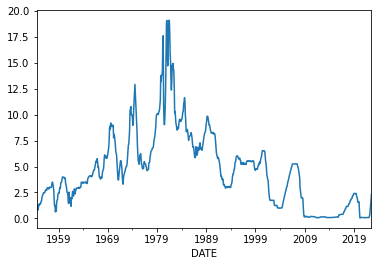

In [25]:
fed_df.set_index(pd.to_datetime(df.DATE))["FEDFUNDS"].plot()

In [11]:
sp5_df = pd.read_csv("./data/SP500.csv")
sp5_df.shape

(11276, 5)

In [12]:
sp5_df.head()

,Date,Open,High,Low,Close
0,09/20/22,3875.05,3876.01,3827.54,3855.93
1,09/19/22,3849.91,3900.45,3838.50,3899.89
2,09/16/22,3880.95,3880.95,3837.08,3873.33
3,09/15/22,3932.41,3959.14,3888.28,3901.35
4,09/14/22,3940.73,3961.94,3912.18,3946.01


In [28]:
sp5_df.tail()

,Date,Open,High,Low,Close
11271,01/09/78,90.64,91.52,90.01,90.64
11272,01/06/78,91.62,92.66,91.05,91.62
11273,01/05/78,92.74,94.53,92.51,92.74
11274,01/04/78,93.52,94.10,93.16,93.52
11275,01/03/78,93.82,95.15,93.49,93.82


In [30]:
sp5_df.isna().sum()

Date      0
 Open     0
 High     0
 Low      0
 Close    0
dtype: int64

In [34]:
sp5_df.columns

Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')

In [35]:
# 2022-40
sp5_df["Price"] = (sp5_df[" Close"] - sp5_df[" Close"].mean()) / sp5_df[" Close"].std()

In [16]:
ndq_df = pd.read_csv("./data/NASDAQ.csv")
ndq_df.shape

(2695, 7)

In [17]:
ndq_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-01,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,102.050003,100.690002,102.050003,102.050003,0
2,1971-02-15,102.190002,102.190002,100.699997,100.699997,100.699997,0
3,1971-02-22,99.680000,101.339996,99.680000,101.339996,101.339996,0
4,1971-03-01,101.779999,103.000000,101.779999,103.000000,103.000000,0


In [21]:
ndq_df["Price"] = (ndq_df["Adj Close"] - ndq_df["Adj Close"].mean() ) / ndq_df["Adj Close"].std()

In [18]:
ndq_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2690,2022-08-22,12523.160156,12655.839844,12141.519531,12141.709961,12141.709961,20755470000
2691,2022-08-29,12021.049805,12124.870117,11546.519531,11630.860352,11630.860352,22776260000
2692,2022-09-05,11643.030273,12132.669922,11471.500000,12112.309570,12112.309570,17800080000
2693,2022-09-12,12174.940430,12270.190430,11316.919922,11448.400391,11448.400391,26454340000
2694,2022-09-19,11338.570313,11538.129883,11337.830078,11535.019531,11535.019531,4168670000


<AxesSubplot:xlabel='Date'>

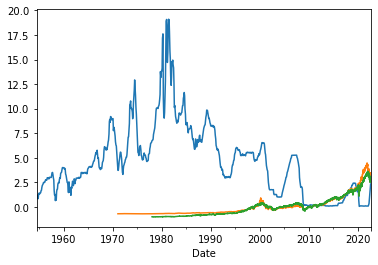

In [36]:
fed_df.set_index(pd.to_datetime(fed_df.DATE))["FEDFUNDS"].plot()
ndq_df.set_index(pd.to_datetime(ndq_df.Date))["Price"].plot()
sp5_df.set_index(pd.to_datetime(sp5_df.Date))["Price"].plot()